C:\Users\anike\AppData\Local\Temp\ipykernel_18924\2347301805.py:53: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = backend.run(qobj).result()


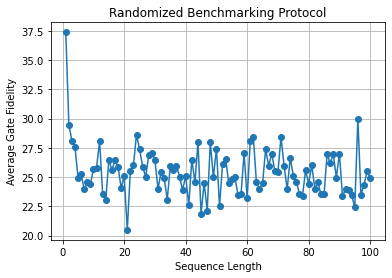

In [1]:
from qiskit import QuantumCircuit, transpile, assemble, Aer
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a random single-qubit Clifford gate
def random_single_qubit_clifford():
    rand_gate = np.random.randint(24)  # 24 different Clifford gates
    qc = QuantumCircuit(1)
    if rand_gate < 8:
        qc.h(0)
        if rand_gate % 2 == 1:
            qc.s(0)
        if rand_gate % 4 == 3:
            qc.sdg(0)
    else:
        qc.s(0)
        qc.h(0)
        if rand_gate % 4 == 2:
            qc.sdg(0)
    return qc.to_gate()

# Function to create a random sequence of Clifford gates
def random_clifford_sequence(num_qubits, length):
    sequence = QuantumCircuit(num_qubits)
    for _ in range(length):
        sequence.append(random_single_qubit_clifford(), range(num_qubits))
    return sequence

# Function to perform randomized benchmarking on a single qubit
def randomized_benchmarking(num_qubits, num_sequences, max_sequence_length):
    backend = Aer.get_backend('qasm_simulator')

    gate_fidelities = []
    sequence_lengths = range(1, max_sequence_length + 1)

    for length in sequence_lengths:
        avg_success_prob = 0

        for _ in range(num_sequences):
            # Create the sequence of random Cliffords
            rb_circuit = random_clifford_sequence(num_qubits, length)

            # Add final Clifford gates (inverse of the initial sequence) for error mitigation
            inverse_clifford = random_clifford_sequence(num_qubits, length).inverse()
            rb_circuit &= inverse_clifford

            # Measure the final state
            rb_circuit.measure_all()

            # Execute the randomized benchmarking circuit
            t_circ = transpile(rb_circuit, backend)
            qobj = assemble(t_circ, shots=1024)
            result = backend.run(qobj).result()

            # Calculate the success probability (average fidelity)
            success_prob = result.get_counts(rb_circuit).get('0' * num_qubits, 0) / 1024
            avg_success_prob += success_prob

        # Calculate the average gate fidelity (normalized to Clifford fidelity)
        gate_fidelity = avg_success_prob / (2 ** num_qubits - 1)
        gate_fidelities.append(gate_fidelity)

    return sequence_lengths, gate_fidelities

if __name__ == "__main__":
    num_qubits = 1  # Number of qubits (can be adjusted for multi-qubit systems)
    num_sequences = 50  # Number of random sequences for each sequence length
    max_sequence_length = 100  # Maximum sequence length for benchmarking

    sequence_lengths, gate_fidelities = randomized_benchmarking(num_qubits, num_sequences, max_sequence_length)

    # Plot the results
    plt.plot(sequence_lengths, gate_fidelities, marker='o')
    plt.xlabel('Sequence Length')
    plt.ylabel('Average Gate Fidelity')
    plt.title('Randomized Benchmarking Protocol')
    plt.grid()
    plt.show()


In [ ]:
from qiskit import QuantumCircuit, transpile, assemble, Aer: Import the necessary Qiskit components, including QuantumCircuit for creating quantum circuits, transpile for optimizing circuits, assemble for assembling circuits for execution, and Aer for selecting the simulator backend.

import numpy as np: Import NumPy, a library for numerical operations, which will be used to generate random numbers.

import matplotlib.pyplot as plt: Import Matplotlib for plotting the results.

def random_single_qubit_clifford():: Define a function to generate a random single-qubit Clifford gate. Clifford gates are a set of gates that are efficient for quantum error correction.

rand_gate = np.random.randint(24): Generate a random integer between 0 and 23 (inclusive) to represent one of 24 different Clifford gates.

The code applies a sequence of Hadamard (H) and phase (S and Sdg) gates based on the random gate selected. The specific gate sequence depends on the random number generated and follows the Clifford group properties.

return qc.to_gate(): Return the resulting quantum circuit as a gate.

def random_clifford_sequence(num_qubits, length):: Define a function to create a random sequence of Clifford gates for a given number of qubits and a specified sequence length.

The function generates a QuantumCircuit, appends a random single-qubit Clifford gate for the specified number of times, and returns the resulting sequence.

def randomized_benchmarking(num_qubits, num_sequences, max_sequence_length):: Define the main function for performing randomized benchmarking.

backend = Aer.get_backend('qasm_simulator'): Select the Qiskit Aer simulator as the backend for executing the randomized benchmarking experiments.

gate_fidelities = [] and sequence_lengths = range(1, max_sequence_length + 1): Initialize lists to store gate fidelities and sequence lengths.

The code iterates through different sequence lengths to perform randomized benchmarking. For each sequence length:

It averages the success probability over multiple random sequences (num_sequences times).
For each random sequence, it constructs a circuit, appends the inverse of the sequence for error mitigation, measures the final state, and executes the circuit on the simulator.
The success probability (average fidelity) is calculated based on the measurement results.
gate_fidelity = avg_success_prob / (2 ** num_qubits - 1): Calculate the average gate fidelity (normalized to Clifford fidelity) and store it in the gate_fidelities list.

return sequence_lengths, gate_fidelities: Return the sequence lengths and gate fidelities.

In the if __name__ == "__main__": block, the code sets the parameters:

num_qubits: The number of qubits (1 in this case, but it can be adjusted for multi-qubit systems).
num_sequences: The number of random sequences for each sequence length.
max_sequence_length: The maximum sequence length for benchmarking.
It calls the randomized_benchmarking function to perform the randomized benchmarking and obtains the sequence lengths and gate fidelities.

Finally, it plots the gate fidelities as a function of sequence length using Matplotlib.